Hao Yu Miao <br>
UIN: 329007009

# Q1-1

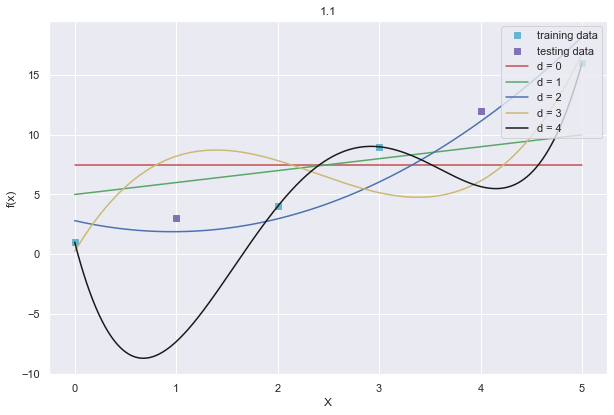

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

train_x = np.array([0,2,3,5])
train_y = np.array([1,4,9,16])
test_x = np.array([1,4])
test_y = np.array([3,12])

def f_0 (x, c_0):
    return c_0 + x * 0

def f_1 (x, c_0):
    return x + c_0

def f_2 (x, c_0, c_1):
    return pow(x, 2) + c_1*x + c_0

def f_3 (x, c_0, c_1, c_2):
    return pow(x, 3) + c_2 * pow(x, 2) + c_1 * pow(x, 1) + c_0

def f_4 (x, c_0, c_1, c_2, c_3):
    return pow(x, 4) + c_3 * pow(x, 3) + c_2 * pow(x, 2) + c_1 * pow(x, 1) + c_0

a0 = np.mean(train_y)
a1, p1 = curve_fit(f_1, train_x, train_y)
a2, p2 = curve_fit(f_2, train_x, train_y)
a3, p3 = curve_fit(f_3, train_x, train_y)
a4, p4 = curve_fit(f_4, train_x, train_y)

x = np.linspace(0, 5, 500)
y0 = f_0 (x, a0)
y1 = f_1 (x, a1[0])
y2 = f_2 (x, a2[0], a2[1])
y3 = f_3 (x, a3[0], a3[1], a3[2])
y4 = f_4 (x, a4[0], a4[1], a4[2], a4[3])

plt.figure(figsize=(10, 6.5))
plt.plot(train_x, train_y,'co',marker="s", label='training data') 
plt.plot(test_x, test_y,'mo',marker="s", label='testing data')
plt.plot(x, y0, color='r', linestyle='-',label='d = 0')
plt.plot(x, y1, color='g', linestyle='-',label='d = 1')
plt.plot(x, y2, color='b', linestyle='-',label='d = 2')
plt.plot(x, y3, color='y', linestyle='-',label='d = 3')
plt.plot(x, y4, color='k', linestyle='-',label='d = 4')
plt.draw()
plt.xlabel('X')
plt.ylabel('f(x)')
plt.title('1.1')
plt.legend(loc = 'upper right')

# Q1 - 2

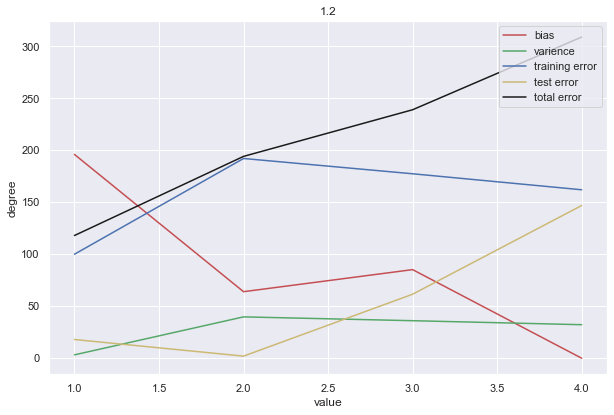

In [121]:
def rss (x, y):
    return np.sum(np.square(x - y))

def bias (x, y):
    res = 0
    for i in range(len(x)):
        res += abs(x[i] - y[i])
        
    return res**2

x = [0, 1, 2, 3, 4, 5]
train_x = np.array([0,2,3,5])
train_y = np.array([1,4,9,16])
test_x = np.array([1,4])
test_y = np.array([3,12])

#train using train_x
y0 = [7.5 for i in train_x]
y1 = [f_1 (i, a1[0]) for i in train_x]
y2 = [f_2 (i, a2[0], a2[1]) for i in train_x]
y3 = [f_3 (i, a3[0], a3[1], a3[2]) for i in train_x ]
y4 = [f_4 (i, a4[0], a4[1], a4[2], a4[3]) for i in train_x]

#test_x (1, 4) test_y(3, 12)



bias_ = [bias(y1, train_y), bias(y2, train_y), bias(y3, train_y), bias(y4, train_y)]
var_ = [np.var(y1), np.var(y2), np.var(y3), np.var(y4)]
train_error = [rss(y1, train_x), rss(y2, train_x), rss(y3, train_x), rss(y4, train_x)]

#predict test_x

y1 = [f_1 (i, a1[0]) for i in test_x]
y2 = [f_2 (i, a2[0], a2[1]) for i in test_x]
y3 = [f_3 (i, a3[0], a3[1], a3[2]) for i in test_x ]
y4 = [f_4 (i, a4[0], a4[1], a4[2], a4[3]) for i in test_x]

test_error = [rss(y1, test_y), rss(y2, test_y), rss(y3, test_y), rss(y4, test_y)]
total_error = [train_error[i] + test_error[i] for i in range (len(train_error)) ]


#plot
x = [1, 2, 3, 4]
plt.figure(figsize=(10, 6.5))
plt.plot(x, bias_, color='r', linestyle='-',label='bias')
plt.plot(x, var_, color='g', linestyle='-',label='varience')
plt.plot(x, train_error, color='b', linestyle='-',label='training error')
plt.plot(x, test_error, color='y', linestyle='-',label='test error')
plt.plot(x, total_error, color='k', linestyle='-',label='total error')
plt.draw()
plt.xlabel('value')
plt.ylabel('degree')
plt.title('1.2')
plt.legend(loc = 'upper right')


# Q1-3
Both test and total error are higher when the degrees are higher, I think this may be resulted from overfitting.<br>
Also, the training data fits more in the higher degrees, which is why bias goes significantly lower in this case.

# Q1-4

In [153]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scipy.optimize import minimize

df = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
x = np.array(df[['Lag1','Lag2']])
y = np.array(df['Today'])

def norm1 (p, x, y):
    v = y - np.dot(x, p)
    return np.linalg.norm(v, ord = 1)

def norm2 (p, x, y):
    v = y - np.dot(x, p)
    return np.linalg.norm(v, ord = 2)

def norm (params, X, y, p):
    error_vector = y - np.dot(X, params)
    return np.linalg.norm(error_vector, ord=p)

def fit(X, params):
    return X.dot(params)

def cal_rss(predict, y_bar):
    rss = 0
    for i in range(len(predict)):
        rss += (predict[i] - y_bar[i])**2
    return rss

L1 = []
L2 = []

kf = KFold(n_splits = 5, shuffle = True)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    l1 = minimize(norm, [0.5, 0.5], args=(x_train, y_train, 1))
    l2 = minimize(norm, [0.5,0.5], args=(x_train, y_train, 2))
    
    rss_L1 = cal_rss(fit(x_test, l1.x), y_test)
    L1.append(rss_L1)
    
    rss_L2 = cal_rss(fit(x_test, l2.x), y_test)
    L2.append(rss_L2)
    
print("L1-norm RSS:")
print(L1)
print("L2-norm RSS:")
print(L2)

L1-norm RSS:
[337.17622890900634, 309.2815022443149, 326.09921957027626, 335.3138973710618, 317.7911853946442]
L2-norm RSS:
[334.5941343438263, 319.0913239509893, 322.63884566858883, 335.91824692603, 314.8462295608944]


# Q2-1
To caculate $\beta_0$  <br>
We solve : $\sum_{n=1}^{2}\left ( \sigma \left ( \beta ^{T}x_n \right )-y_n \right )x_n = 0$ <br>
Using two training points {(−3, 1), (−1, 0)} <br>
We can get $\beta_0 = 3.78196$

# Q2-2

Now we get $\beta_0$, we can get the output using signoid function: <br>
$\sigma(x) = \frac{1}{1+e^{-x}}$ <br>
We get: <br>
$\frac{1}{1+e^{-(-4+3.78)}} \quad  = 0.445 $   <br>
$\frac{1}{1+e^{-(5+3.78)}} \quad  = 0.999 $  <br>
Therefore, for the two input data we get y = 0 and y = 1


In [146]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import math
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
train_x = np.array([-3, -1]).reshape(-1, 1)
train_y = np.array([1, 0])

lr = LogisticRegression(multi_class = 'multinomial', solver='newton-cg')
lr.fit(train_x, train_y)
a = lr.coef_[0]
b = lr.intercept_
x = np.linspace(-5, 2, 500)
y = a*x + b

c = 3.78196
def predict(x):
    return 1/(1+(math.e**-(x + c)))

#predict (-4, 5)
predict(-4)
print ("Output for x = -4")
print (predict(-4))
print ("Output for x = 5")
print (predict(5))

Output for x = -4
0.44570493522323384
Output for x = 5
0.9998465465762316
